In [ ]:
import math
import matplotlib.pyplot as pyplot

dt = 0.01 # intervalo de tempo entre cada ponto para o calculo analitico da posicao
t = 0 # instante de tempo inicial

# DADOS DO SISTEMA
g = 9.81 # valor da aceleracao da gravidade
L = 0.2905 # comprimento do fio
ni = 1.853 # viscosidade do ar
raio = 1/100 # raio da esfera em metros
A = 1 # area de contato entre a esfera e o ar
a0 = -0.1570796327 # angulo inicial em relacao ao eixo de repouso

# DADOS CALCULADOS DO SISTEMA
b = 6*math.pi*(raio)* ni * math.pow(10, -5) # valor auxiliar no calculo analitico amortecido
w0 = math.sqrt(g/L) # frequencia angular
m = 8.37 * 10**(-3) # massa da esfera em kg
alpha = b/(2*m) # valor auxiliar no calculo analitico amortecido
wL = math.sqrt( math.pow(w0,2) - math.pow(alpha,2) ) # valor auxiliar no calculo analitico amortecido

aList = []
aListAmort = []
vList = []
vListAmort = []
accList = []
accListAmort = []
tList = []

BASEACC_MED = []
BASEV_MED = []

def ang(t): # calculo analitico do angulo em funcao do tempo
  return a0 * math.cos(t * w0)

def angAmort(t): # calculo analitico do angulo em funcao do tempo c/ amortecimento por resistencia do ar
  return math.exp(-alpha*t)* (a0*math.cos(wL*t))

while t < 2.2:
  # calculo analitico da angulacao atual de acordo com a angulacao inicial (a0) e o tempo atual
  aList.append(ang(t)) # sem amortecimento
  aListAmort.append(angAmort(t)) # amortecido
  # incremento do tempo de experimento
  tList.append(t)
  t += dt

# calculo das velocidades instantaneas como variacao do angulo sobre a variacao do tempo em cada intervalo
vList.append(0)
vListAmort.append(0)
t=dt
i=0
while t < 2.2:
  vList.append( ( ang(t) - ang(t-dt)  )/dt )
  vListAmort.append( ( angAmort(t) - angAmort(t-dt)  )/dt  )  
  t += dt
  i+=1

# calculo das aceleracoes instantaneas como variacao da velocidade angular sobre a variacao do tempo em cada intervalo
t=0
i=0
while t < 2.2 -dt:
  accList.append((vList[i+1] - vList[i])/dt) # com amortecimento
  accListAmort.append((vListAmort[i+1] - vListAmort[i])/dt) # com amortecimento
  t += dt
  i+=1
accList.append(accList[len(accList) -1 ])
accListAmort.append(accListAmort[len(accListAmort) -1 ])










Dados Base 1
Período Médio calculado: 1,0656
Período Médio teórico:  1.0812308609757606

Ângulos calculados nos tempos do experimento
[-0.1570679364686002, -0.14397139269840667, -0.1081655341259933, -0.055384439950386194, 0.006198468847143616, 0.06672108337072123, 0.11681116882463446, 0.14844711845149042, 0.1567299444890749, 0.14033320533300037, 0.10179601946756357, 0.047289870685370675, -0.014744686549465893, -0.07437321473304759, -0.1223619328884875, -0.1510257547887222, -0.15592594177207642, -0.1362777602398357, -0.09512383107145987, -0.03905469276012145, 0.023247063349048608, 0.08180420956170781, 0.1275488738503168, 0.15315534085929322, 0.1546583188875772, 0.13181711561854256, 0.08816880759356387, 0.030703392123068263, -0.03168031882551281, -0.0889919730145736, -0.13235656919344435, -0.15482954468893734]
Máximo valor de erro: 0.08435275392051679

Ângulos calculados nos tempos do experimento c/ amortecimento
[-0.15706786764653016, -0.14396926591167383, -0.10816238361593242, -0.05538

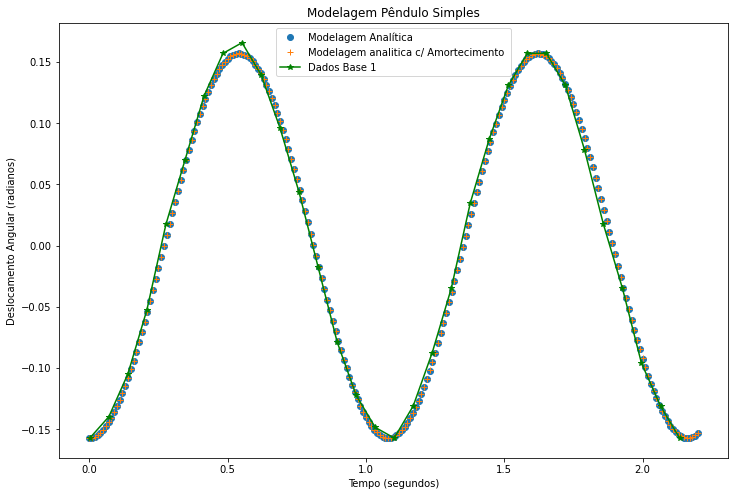

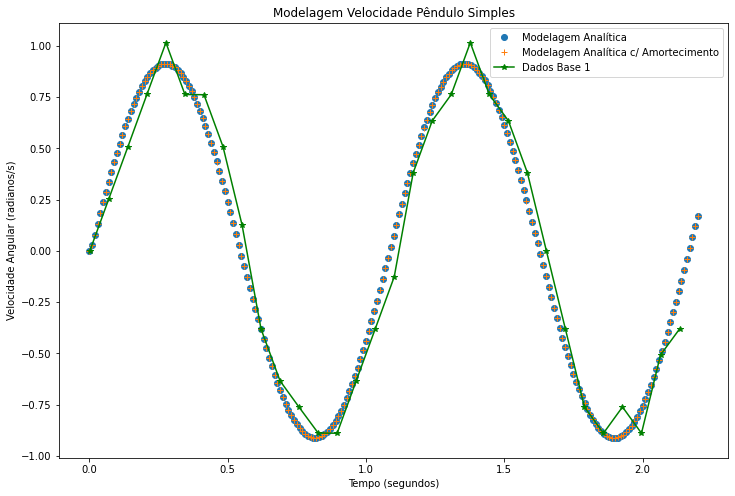

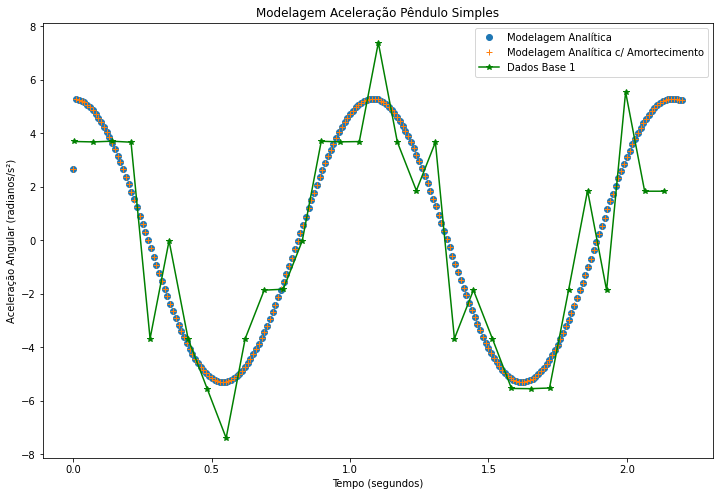

In [ ]:
BASET = [  0.0021, 0.0708, 0.1396, 0.2083, 0.2771, 0.3458, 0.4146, 0.4833, 0.5521, 0.6208, 0.6896, 0.7583, 0.8271, 0.8958, 0.9646, 1.0333, 1.1021, 1.1708, 
         1.2396, 1.3083, 1.3771, 1.4458, 1.5146, 1.5833, 1.6521, 1.7208, 1.7896, 1.8583, 1.9271, 1.9958, 2.0646, 2.1333 ]

BASEANGLES = [ -0.1570796327, -0.1396263402, -0.1047197551, -0.05235987756, 0.01745329252, 0.06981317008, 0.1221730476, 0.1570796327, 0.1658062789, 0.1396263402, 0.09599310886, 0.0436332313, -0.01745329252, -0.07853981634, -0.1221730476,
         -0.1483529864, -0.1570796327, -0.1308996939, -0.0872664626, -0.03490658504,0.03490658504, 0.0872664626, 0.1308996939, 0.1570796327, 0.1570796327, 0.1308996939, 0.07853981634, 0.01745329252, -0.03490658504,
      -0.09599310886, -0.1308996939, -0.1570796327 ]
CALC_ANGLES = [ ]
CALC_ANGLES_AMORT = []


BASEV = []
BASEACC = []
BASEV_MED.append(0)

BASEV.append(0)

for j in range(1, len(BASET) ):
  BASEV.append( (BASEANGLES[j] - BASEANGLES[j-1])/(BASET[j]-BASET[j-1]) )
  BASEV_MED.append((BASEANGLES[j] - BASEANGLES[j-1])/(BASET[j]-BASET[j-1]) /5)
  
for j in range(0, len(BASET)-1 ):
  BASEACC.append( (BASEV[j+1] - BASEV[j])/(BASET[j+1]-BASET[j]) )
  BASEACC_MED.append((BASEV[j+1] - BASEV[j])/(BASET[j+1]-BASET[j])/5)

BASEACC.append(BASEACC[len(BASEACC)-1])
BASEACC_MED.append(BASEACC[len(BASEACC)-1]/5)
  
print("Dados Base 1")
print("Período Médio calculado: 1,0656")
print("Período Médio teórico: ", 2*math.pi/w0)

maxError = 0
maxErrorAmort = 0
tterror = 0
tterrorAmort = 0

for tt in range(0, len(BASET) ):
  CALC_ANGLES.append( ang(BASET[tt]) )
  if(maxError <  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxError =  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0])
    tterror = tt
  CALC_ANGLES_AMORT.append( angAmort(BASET[tt]) )
  if(maxErrorAmort < abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxErrorAmort = abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) 
    tterrorAmort = tt
print()
print("Ângulos calculados nos tempos do experimento")
print(CALC_ANGLES)
print("Máximo valor de erro:", maxError)
print("")
print("Ângulos calculados nos tempos do experimento c/ amortecimento")
print(CALC_ANGLES_AMORT)
print("Máximo valor de erro:", maxErrorAmort)

pyplot.figure(0, figsize=[12, 8])
pyplot.plot(tList,aList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,aListAmort,label='Modelagem analitica c/ Amortecimento ',linestyle='',marker='+') 
pyplot.plot(BASET,BASEANGLES,label='Dados Base 1',linestyle='-',marker='*', color='green') 
pyplot.title('Modelagem Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Deslocamento Angular (radianos)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(1, figsize=[12, 8])
pyplot.plot(tList,vList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,vListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEV ,label='Dados Base 1',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Velocidade Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Velocidade Angular (radianos/s)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(2, figsize=[12, 8])
pyplot.plot(tList,accList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,accListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEACC ,label='Dados Base 1',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Aceleração Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Aceleração Angular (radianos/s²)')
pyplot.legend()
pyplot.show(block=False)

Dados Base 2
Período Médio calculado: 1,0658
Período Médio teórico:  1.0812308609757606

Ângulos calculados nos tempos do experimento
[-0.15697769163863323, -0.1423954510749856, -0.10542124017468264, -0.051866873860952664, 0.009935969803082482, 0.0701716392000934, 0.11933932133378009, 0.14965622315289676, 0.1564359000792879, 0.138569110760199, 0.09891710721059785, 0.04362020392801011, -0.01846615376310764, -0.07772757748128395, -0.12472923575321215, -0.1520347587939558, -0.15542897207520712, -0.134330757963006, -0.09211886048139817, -0.035330006727922414, 0.026941431649111666, 0.08505240558233544, 0.1297482882845263, 0.15396124406073505, 0.15377628250043915, 0.12969299472904064, 0.08496995447634646, 0.02693476155794062, -0.03533660361488255, -0.09212434433043971, -0.1388786333080381, -0.15546929817523694]
Máximo valor de erro: 0.07739838802797253

Ângulos calculados nos tempos do experimento c/ amortecimento
[-0.1569774885665824, -0.14239322278638392, -0.10541807941952877, -0.051864575

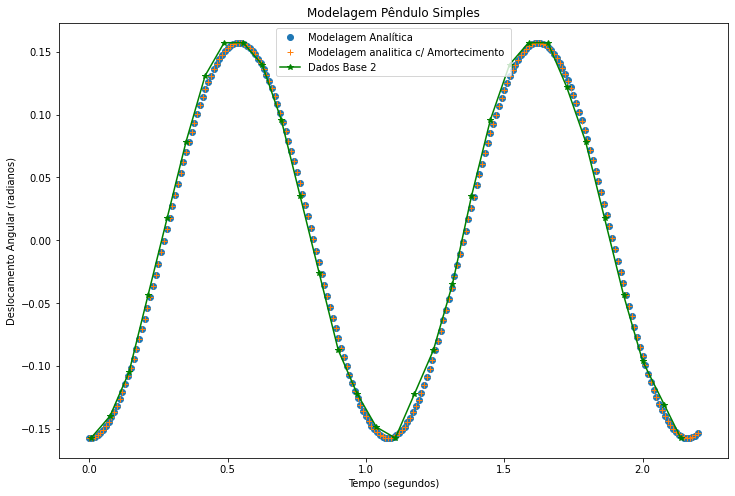

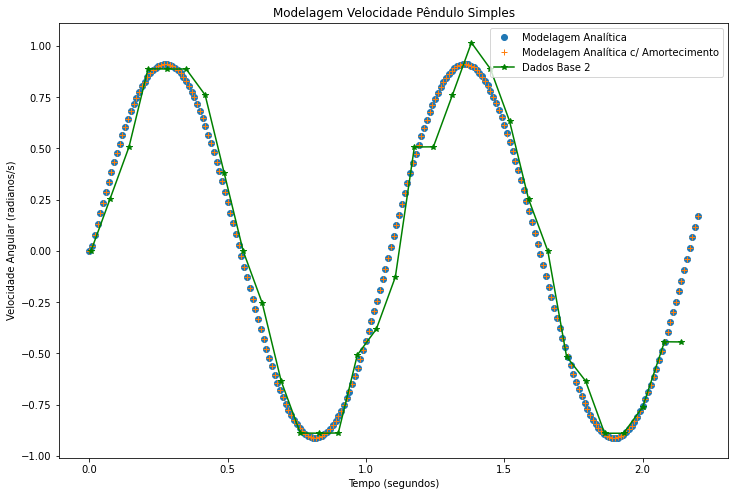

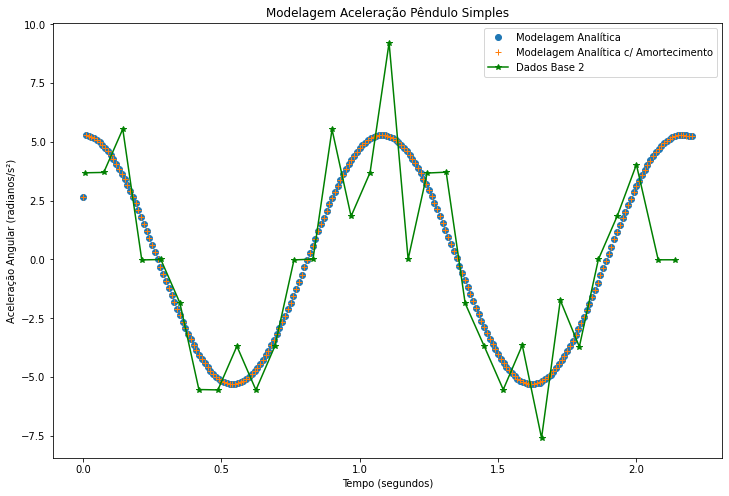

In [ ]:
BASET = [  
  0.0062, 0.0750, 0.1437, 0.2124, 0.2812, 0.3500, 0.4188, 0.4875, 0.5562, 0.6250, 0.6937, 0.7625, 0.8312, 0.9000, 0.9688, 1.0375, 1.1062,
   1.1750, 1.2437, 1.3125, 1.3812, 1.45, 1.5188, 1.5875, 1.6572, 1.725, 1.7938, 1.8625, 1.9312, 2, 2.0788, 2.1378
]

BASEANGLES = [ 
  -0.1570796327, -0.1396263402, -0.1047197551, -0.0436332313, 0.01745329252, 0.07853981634, 0.1308996939, 0.1570796327, 0.1570796327, 0.1396263402, 0.09599310886, 0.03490658504, -0.02617993878, -0.0872664626, -0.1221730476, -0.1483529864, -0.1570796327, -0.1221730476, -0.0872664626, -0.03490658504, 0.03490658504, 0.09599310886, 0.1396263402, 0.1570796327, 0.1570796327, 0.1221730476, 0.07853981634, 0.01745329252, -0.0436332313, -0.09599310886, -0.1308996939, -0.1570796327]
BASEV = []
BASEACC = []


BASEV.append(0)

for j in range(1, len(BASET) ):
  BASEV.append( (BASEANGLES[j] - BASEANGLES[j-1])/(BASET[j]-BASET[j-1]) )
  BASEV_MED[j]+=((BASEANGLES[j] - BASEANGLES[j-1])/(BASET[j]-BASET[j-1]) /5)  


for j in range(0, len(BASET)-1 ):
  BASEACC.append( (BASEV[j+1] - BASEV[j])/(BASET[j+1]-BASET[j]) )
  BASEACC_MED[j] += ((BASEV[j+1] - BASEV[j])/(BASET[j+1]-BASET[j])/5)
BASEACC.append(BASEACC[len(BASEACC)-1])
BASEACC_MED[len(BASEACC) -1 ] += (BASEACC[len(BASEACC)-1]/5)

print("Dados Base 2")
print("Período Médio calculado: 1,0658")
print("Período Médio teórico: ", 2*math.pi/w0)

CALC_ANGLES = []
CALC_ANGLES_AMORT = []
maxError = 0
maxErrorAmort = 0
tterror = 0
tterrorAmort = 0

for tt in range(0, len(BASET) ):
  CALC_ANGLES.append( ang(BASET[tt]) )
  if(maxError <  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxError =  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0])
    tterror = tt
  CALC_ANGLES_AMORT.append( angAmort(BASET[tt]) )
  if(maxErrorAmort < abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxErrorAmort = abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) 
    tterrorAmort = tt

print()
print("Ângulos calculados nos tempos do experimento")
print(CALC_ANGLES)
print("Máximo valor de erro:", maxError)
print("")
print("Ângulos calculados nos tempos do experimento c/ amortecimento")
print(CALC_ANGLES_AMORT)
print("Máximo valor de erro:", maxErrorAmort)


pyplot.figure(0, figsize=[12, 8])
pyplot.plot(tList,aList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,aListAmort,label='Modelagem analitica c/ Amortecimento ',linestyle='',marker='+') 
pyplot.plot(BASET,BASEANGLES,label='Dados Base 2',linestyle='-',marker='*', color='green') 
pyplot.title('Modelagem Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Deslocamento Angular (radianos)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(1, figsize=[12, 8])
pyplot.plot(tList,vList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,vListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEV ,label='Dados Base 2',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Velocidade Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Velocidade Angular (radianos/s)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(2, figsize=[12, 8])
pyplot.plot(tList,accList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,accListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEACC ,label='Dados Base 2',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Aceleração Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Aceleração Angular (radianos/s²)')
pyplot.legend()
pyplot.show(block=False)

Dados Base 3
Período Médio calculado: 1,06565
Período Médio teórico:  1.0812308609757606

Ângulos calculados nos tempos do experimento
[-0.15679285377102103, -0.14073468989293472, -0.10254797756732403, -0.048146123490334224, 0.013758763418192807, 0.07358039645078665, 0.12173872375838352, 0.15077618332968382, 0.1560426117680015, 0.13672247583427766, 0.09590977170670409, 0.039924554272905234, -0.02226750203451549, -0.08103564086556213, -0.12696852072830878, -0.15295320147128222, -0.15482840269841852, -0.1323037399587438, -0.08898639389895154, -0.031584275953392006, 0.030710031892335656, 0.08824993911727665, 0.13182079766418212, 0.15467543840021014, 0.15315383681343242, 0.13076479198842356, 0.08179842967039004, 0.023150086978977583, -0.03826499522514352, -0.09520184067546808, -0.13628112711781762, -0.15593777332794206]
Máximo valor de erro: 0.0918224754607386

Ângulos calculados nos tempos do experimento c/ amortecimento
[-0.1567925135354238, -0.1407323642663827, -0.10254481310000532, -0.

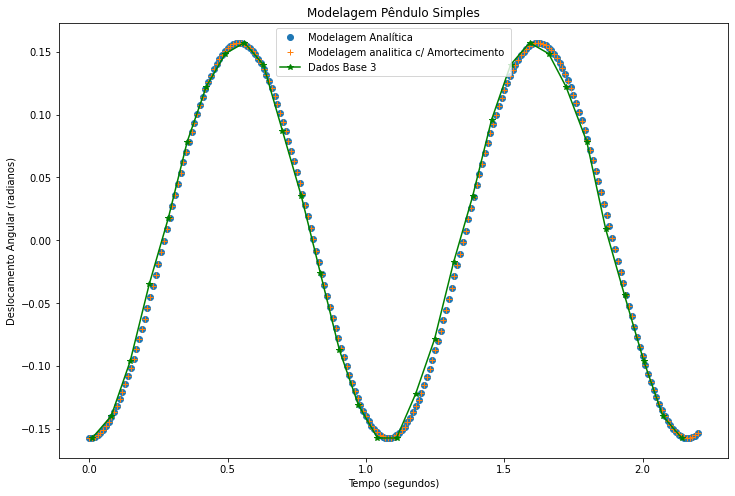

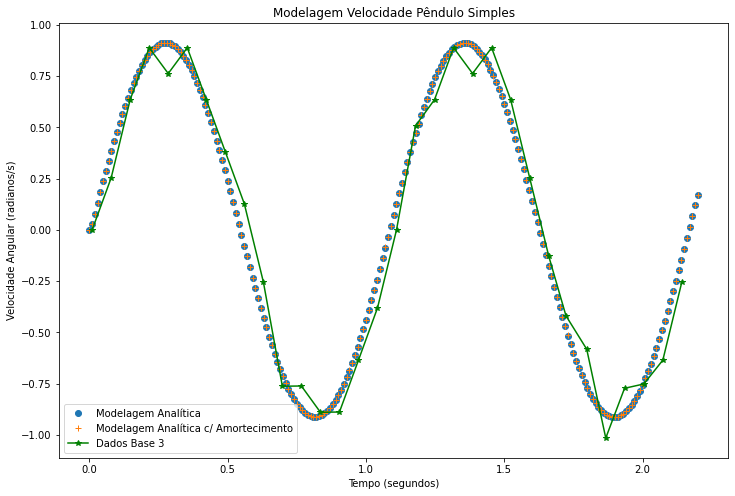

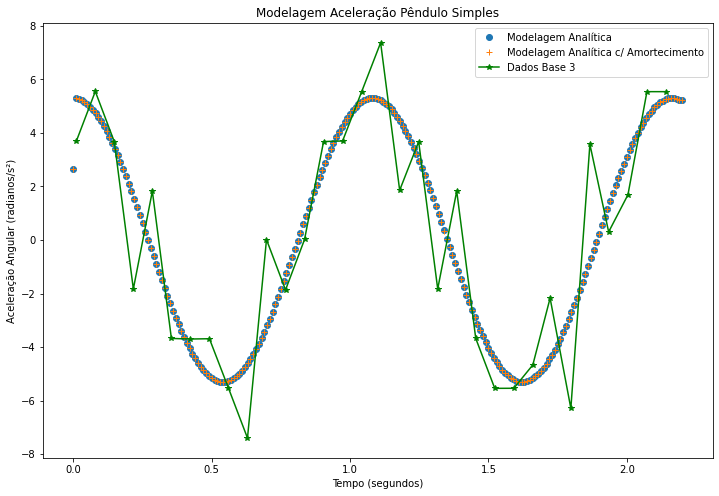

In [ ]:
BASET = [  
  0.0104, 0.0792, 0.1479, 0.2167, 0.2854, 0.3542, 0.4229, 0.4917, 0.5604, 0.6292, 0.6979, 0.7667, 0.8354, 0.9042, 0.9729, 1.0417, 1.1104, 1.1792, 1.2479, 1.3167, 1.3854, 1.4542, 1.5229, 1.5917, 1.6604, 1.7229, 1.7979, 1.8667, 1.9345, 2.0042, 2.0729, 2.1417, ]

BASEANGLES = [ 
  -0.1570796327, -0.1396263402, -0.09599310886, -0.03490658504, 0.01745329252, 0.07853981634, 0.1221730476, 0.1483529864, 0.1570796327, 0.1396263402, 0.0872664626, 0.03490658504, -0.02617993878, -0.0872664626, -0.1308996939, -0.1570796327, -0.1570796327, -0.1221730476, -0.07853981634, -0.01745329252, 0.03490658504, 0.09599310886, 0.1396263402, 0.1570796327, 0.1483529864, 0.1221730476, 0.07853981634, 0.00872664626, -0.0436332313, -0.09599310886, -0.1396263402, -0.1570796327
    ]

BASEV = []
BASEACC = []


BASEV.append(0)
for tt in range(1, len(BASET) ):
  BASEV.append( (BASEANGLES[tt] - BASEANGLES[tt-1])/(BASET[tt]-BASET[tt-1]) )
  BASEV_MED[tt]+=((BASEANGLES[tt] - BASEANGLES[tt-1])/(BASET[tt]-BASET[tt-1]) /5)  
for tt in range(0, len(BASET)-1 ):
  BASEACC.append( (BASEV[tt+1] - BASEV[tt])/(BASET[tt+1]-BASET[tt]) )
  BASEACC_MED[tt] += ((BASEV[tt+1] - BASEV[tt])/(BASET[tt+1]-BASET[tt])/5)
BASEACC.append(BASEACC[len(BASEACC)-1])
BASEACC_MED[len(BASEACC) -1 ] += (BASEACC[len(BASEACC)-1]/5)
  
print("Dados Base 3")
print("Período Médio calculado: 1,06565")
print("Período Médio teórico: ", 2*math.pi/w0)

CALC_ANGLES = []
CALC_ANGLES_AMORT = []
maxError = 0
maxErrorAmort = 0
tterror = 0
tterrorAmort = 0

for tt in range(0, len(BASET) ):
  CALC_ANGLES.append( ang(BASET[tt]) )
  if(maxError <  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxError =  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0])
    tterror = tt
  CALC_ANGLES_AMORT.append( angAmort(BASET[tt]) )
  if(maxErrorAmort < abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxErrorAmort = abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) 
    tterrorAmort = tt
print()
print("Ângulos calculados nos tempos do experimento")
print(CALC_ANGLES)
print("Máximo valor de erro:", maxError)
print("")
print("Ângulos calculados nos tempos do experimento c/ amortecimento")
print(CALC_ANGLES_AMORT)
print("Máximo valor de erro:", maxErrorAmort)


pyplot.figure(0, figsize=[12, 8])
pyplot.plot(tList,aList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,aListAmort,label='Modelagem analitica c/ Amortecimento ',linestyle='',marker='+') 
pyplot.plot(BASET,BASEANGLES,label='Dados Base 3',linestyle='-',marker='*', color='green') 
pyplot.title('Modelagem Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Deslocamento Angular (radianos)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(1, figsize=[12, 8])
pyplot.plot(tList,vList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,vListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEV ,label='Dados Base 3',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Velocidade Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Velocidade Angular (radianos/s)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(2, figsize=[12, 8])
pyplot.plot(tList,accList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,accListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEACC ,label='Dados Base 3',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Aceleração Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Aceleração Angular (radianos/s²)')
pyplot.legend()
pyplot.show(block=False)

Dados Base 4
Período Médio calculado: 1,0656
Período Médio teórico:  1.0812308609757606

Ângulos calculados nos tempos do experimento
[-0.15651462035914973, -0.13903260265739997, -0.09961363102694663, -0.04457040160984865, 0.017573361460820943, 0.07686573206514855, 0.1241249849377516, 0.15178285305019787, 0.1555563748031051, 0.13484124482709764, 0.09284530639674536, 0.03629394040216276, -0.026055586401212215, -0.08421839614795147, -0.1291876818186321, -0.15376189998320827, -0.15413560792621803, -0.1302489587112113, -0.08580092150348488, -0.027909565126187422, 0.03446033933666086, 0.09132065066782336, 0.13386626035459115, 0.1552837611714011, 0.15225654414534914, 0.12526939871794301, 0.07850142166817521, 0.019532781349817188, -0.04276263011530721, -0.09815137823792862, -0.13814680956109462, -0.15634391161059188]
Máximo valor de erro: 0.08530134812427946

Ângulos calculados nos tempos do experimento c/ amortecimento
[-0.15651414356871723, -0.13903018622378113, -0.09961046982183018, -0.044

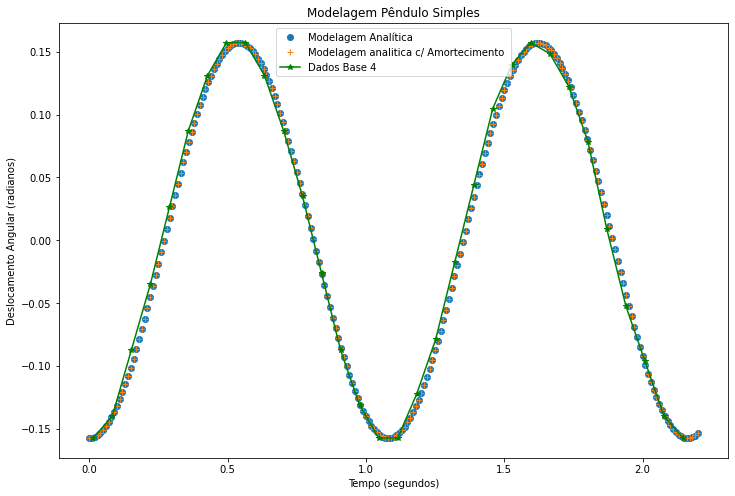

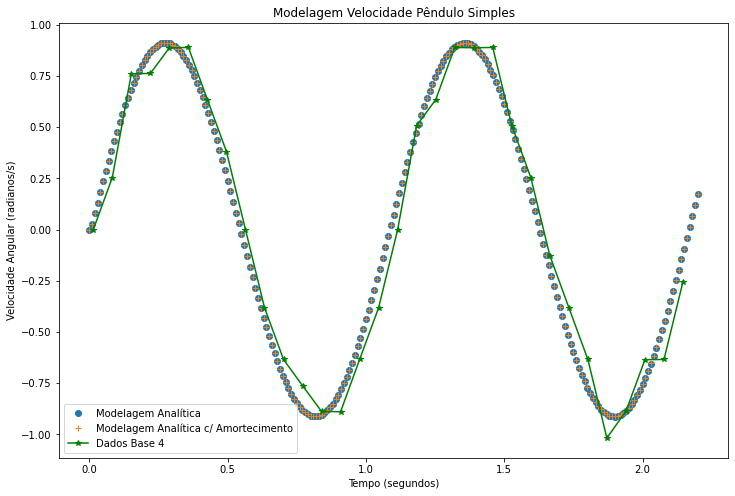

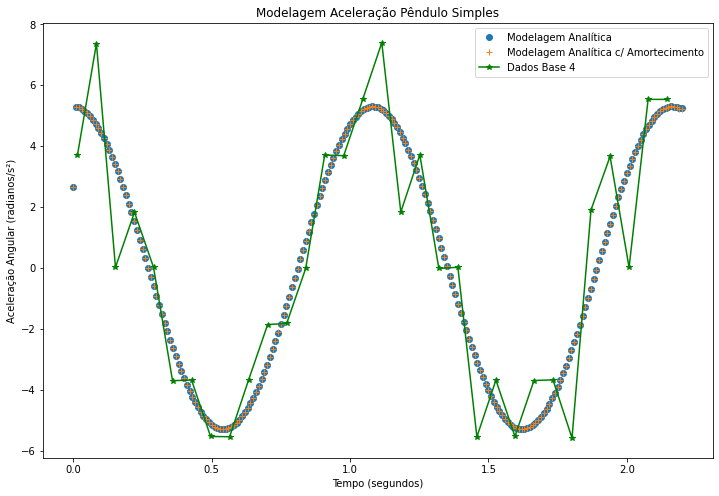

In [ ]:
BASET = [  
  0.0146, 0.0833, 0.1521, 0.2208, 0.2896, 0.3583, 0.4271, 0.4958, 0.5646, 0.6333, 0.7021, 0.7708, 0.8396, 0.9083, 0.9771, 1.0458, 1.1146, 1.1833, 1.2521, 1.3208, 1.3896, 1.4583, 1.5271, 1.5958, 1.6646, 1.7333, 1.8021, 1.8707, 1.9396, 2.0083, 2.0771, 2.1458,   
  ]

BASEANGLES = [ 
  -0.1570796327, -0.1396263402, -0.0872664626, -0.03490658504, 0.02617993878, 0.0872664626, 0.1308996939, 0.1570796327, 0.1570796327, 0.1308996939, 0.0872664626, 0.03490658504, -0.02617993878, -0.0872664626, -0.1308996939, -0.1570796327, -0.1570796327, -0.1221730476, -0.07853981634, -0.01745329252, 0.0436332313, 0.1047197551, 0.1396263402, 0.1570796327, 0.1483529864, 0.1221730476, 0.07853981634, 0.00872664626, -0.05235987756, -0.09599310886, -0.1396263402, -0.1570796327   
    ]

BASEV = []
BASEACC = []


BASEV.append(0)
for tt in range(1, len(BASET) ):
  BASEV.append( (BASEANGLES[tt] - BASEANGLES[tt-1])/(BASET[tt]-BASET[tt-1]) )
  BASEV_MED[tt]+=((BASEANGLES[tt] - BASEANGLES[tt-1])/(BASET[tt]-BASET[tt-1]) /5)  
for tt in range(0, len(BASET)-1 ):
  BASEACC.append( (BASEV[tt+1] - BASEV[tt])/(BASET[tt+1]-BASET[tt]) )
  BASEACC_MED[tt] += ((BASEV[tt+1] - BASEV[tt])/(BASET[tt+1]-BASET[tt])/5)
BASEACC.append(BASEACC[len(BASEACC)-1])
BASEACC_MED[len(BASEACC) -1 ] += (BASEACC[len(BASEACC)-1]/5)
  
print("Dados Base 4")
print("Período Médio calculado: 1,0656")
print("Período Médio teórico: ", 2*math.pi/w0)

CALC_ANGLES = []
CALC_ANGLES_AMORT = []
maxError = 0
maxErrorAmort = 0
tterror = 0
tterrorAmort = 0

for tt in range(0, len(BASET) ):
  CALC_ANGLES.append( ang(BASET[tt]) )
  if(maxError <  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxError =  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0])
    tterror = tt
  CALC_ANGLES_AMORT.append( angAmort(BASET[tt]) )
  if(maxErrorAmort < abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxErrorAmort = abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) 
    tterrorAmort = tt
print()
print("Ângulos calculados nos tempos do experimento")
print(CALC_ANGLES)
print("Máximo valor de erro:", maxError)
print("")
print("Ângulos calculados nos tempos do experimento c/ amortecimento")
print(CALC_ANGLES_AMORT)
print("Máximo valor de erro:", maxErrorAmort)

pyplot.figure(0, figsize=[12, 8])
pyplot.plot(tList,aList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,aListAmort,label='Modelagem analitica c/ Amortecimento ',linestyle='',marker='+') 
pyplot.plot(BASET,BASEANGLES,label='Dados Base 4',linestyle='-',marker='*', color='green') 
pyplot.title('Modelagem Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Deslocamento Angular (radianos)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(1, figsize=[12, 8])
pyplot.plot(tList,vList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,vListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEV ,label='Dados Base 4',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Velocidade Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Velocidade Angular (radianos/s)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(2, figsize=[12, 8])
pyplot.plot(tList,accList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,accListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEACC ,label='Dados Base 4',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Aceleração Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Aceleração Angular (radianos/s²)')
pyplot.legend()
pyplot.show(block=False)

Dados Base 5
Período Médio calculado: 1,067
Período Médio teórico:  1.0812308609757606

Ângulos calculados nos tempos do experimento
[-0.1561530833663711, -0.1372071788112187, -0.09669190256917032, -0.040881251306475366, 0.021377491719882253, 0.08018594122251856, 0.12638312410337818, 0.1527247360238462, 0.15499233634308449, 0.13283477561419574, 0.08980044544521028, 0.032553430819813496, -0.029828150445302504, -0.08742919594667994, -0.13127978988758496, -0.1544998193217479, -0.15337074507463855, -0.12806741003810823, -0.08264198145192647, -0.02412881805549799, 0.04268834453543957, 0.09441249432227876, 0.13578611678728392, 0.15581552279292718, 0.15126855804025355, 0.12291925706116566, 0.07523779510578761, 0.01563246221532641, -0.04643853764067718, -0.10111507265902857, -0.13988870597987824, -0.15666793440929713]
Máximo valor de erro: 0.09951934535766463
angulo calculado: 0.01563246221532641
angulo origina: 0.0
erro absoluto: 0.01563246221532641
erro absoluto/angulo original: 15.632462215

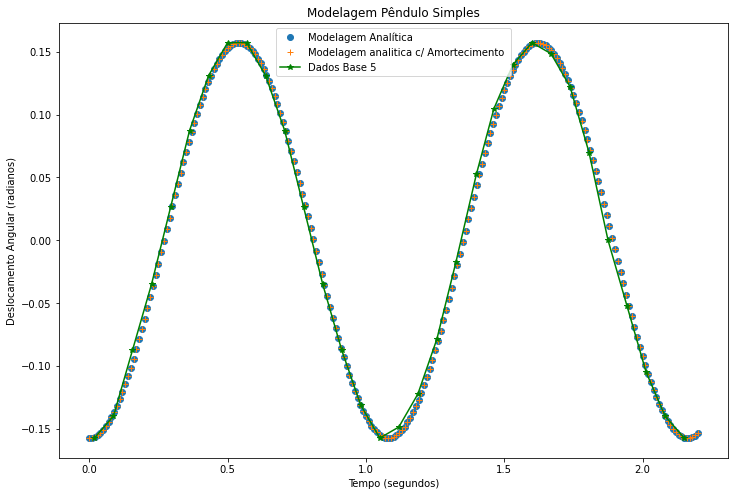

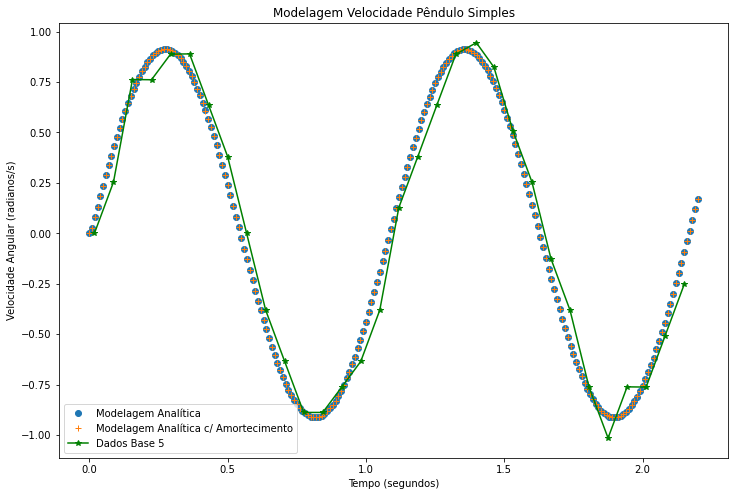

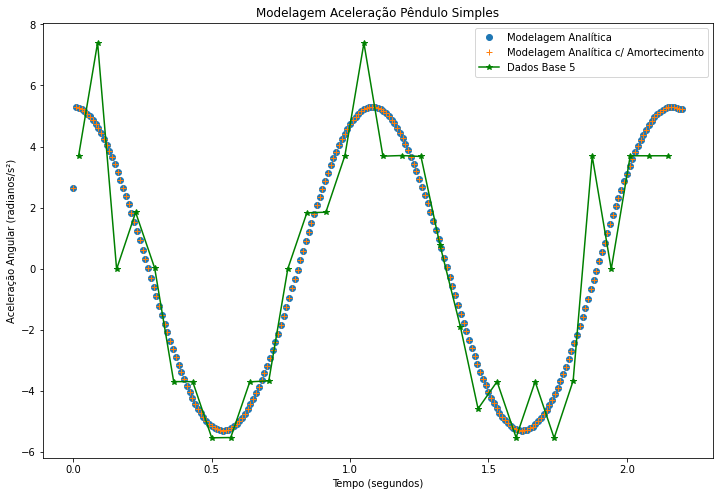

In [ ]:
BASET = [  
  0.0187, 0.0875, 0.1562, 0.2250, 0.2938, 0.3625, 0.4312, 0.5000, 0.5687, 0.6375, 0.7062, 0.7750, 0.8438, 0.9125, 0.9812, 1.0500, 1.1187, 1.1875, 1.2562, 1.3250, 1.3989, 1.4625, 1.5312, 1.6, 1.6688, 1.7375, 1.8062, 1.875, 1.9438, 2.0125, 2.0812, 2.15   ,   ]

BASEANGLES = [ 
  -0.1570796327, -0.1396263402, -0.0872664626, -0.03490658504, 0.02617993878, 0.0872664626, 0.1308996939, 0.1570796327, 0.1570796327, 0.1308996939, 0.0872664626, 0.02617993878, -0.03490658504, -0.0872664626, -0.1308996939, -0.1570796327, -0.1483529864, -0.1221730476, -0.07853981634, -0.01745329252, 0.05235987756, 0.1047197551, 0.1396263402, 0.1570796327, 0.1483529864, 0.1221730476, 0.06981317008, 0.0, -0.05235987756, -0.1047197551, -0.1396263402, -0.1570796327   ,     ]

BASEV = []
BASEACC = []


BASEV.append(0)
for tt in range(1, len(BASET) ):
  BASEV.append( (BASEANGLES[tt] - BASEANGLES[tt-1])/(BASET[tt]-BASET[tt-1]) )

for tt in range(0, len(BASET)-1 ):
  BASEACC.append( (BASEV[tt+1] - BASEV[tt])/(BASET[tt+1]-BASET[tt]) )
  BASEACC_MED[tt] += ((BASEV[tt+1] - BASEV[tt])/(BASET[tt+1]-BASET[tt])/5)
BASEACC.append(BASEACC[len(BASEACC)-1])
BASEACC_MED[len(BASEACC) -1 ] += (BASEACC[len(BASEACC)-1]/5)  
print("Dados Base 5")
print("Período Médio calculado: 1,067") 
print("Período Médio teórico: ", 2*math.pi/w0)

CALC_ANGLES = []
CALC_ANGLES_AMORT = []
maxError = 0
maxErrorAmort = 0
tterror = 0
tterrorAmort = 0

for tt in range(0, len(BASET) ):
  CALC_ANGLES.append( ang(BASET[tt]) )
  if(maxError <  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxError =  abs(BASEANGLES[tt]-ang(BASET[tt]))/abs(BASEANGLES[0])
    tterror = tt
  CALC_ANGLES_AMORT.append( angAmort(BASET[tt]) )
  if(maxErrorAmort < abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) ):
    maxErrorAmort = abs(BASEANGLES[tt]-angAmort(BASET[tt]))/abs(BASEANGLES[0]) 
    tterrorAmort = tt
print()
print("Ângulos calculados nos tempos do experimento")
print(CALC_ANGLES)
print("Máximo valor de erro:", maxError)
print("angulo calculado:", ang(BASET[tterror]))
print("angulo origina:",  BASEANGLES[tterror])
print("erro absoluto:",  abs(BASEANGLES[tterror]-ang(BASET[tterror])) )
print("erro absoluto/angulo original:",  abs(BASEANGLES[tterror]-ang(BASET[tterror]))/abs(BASEANGLES[tterror] +0.001 ) )
print("erro absoluto/maxima amplitude:",  abs(BASEANGLES[tterror]-ang(BASET[tterror]))/abs(BASEANGLES[0]) )
print("")
print("Ângulos calculados nos tempos do experimento c/ amortecimento")
print(CALC_ANGLES_AMORT)
print("Máximo valor de erro:", maxErrorAmort)
print("angulo calculado:", ang(BASET[tterrorAmort]))
print("angulo origina:",  BASEANGLES[tterrorAmort])
print("erro absoluto:",  abs(BASEANGLES[tterrorAmort]-ang(BASET[tterrorAmort])) )
print("erro absoluto/angulo original:",  abs(BASEANGLES[tterrorAmort]-ang(BASET[tterrorAmort]))/abs(BASEANGLES[tterrorAmort] +0.001) )
print("erro absoluto/maxima amplitude:",  abs(BASEANGLES[tterrorAmort]-ang(BASET[tterrorAmort]))/abs(BASEANGLES[0]) )


pyplot.figure(0, figsize=[12, 8])
pyplot.plot(tList,aList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,aListAmort,label='Modelagem analitica c/ Amortecimento ',linestyle='',marker='+') 
pyplot.plot(BASET,BASEANGLES,label='Dados Base 5',linestyle='-',marker='*', color='green') 
pyplot.title('Modelagem Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Deslocamento Angular (radianos)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(1, figsize=[12, 8])
pyplot.plot(tList,vList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,vListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEV ,label='Dados Base 5',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Velocidade Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Velocidade Angular (radianos/s)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(2, figsize=[12, 8])
pyplot.plot(tList,accList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,accListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEACC ,label='Dados Base 5',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Aceleração Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Aceleração Angular (radianos/s²)')
pyplot.legend()
pyplot.show(block=False)

Dados Médios
Período Médio calculado: 1,067
Período Médio teórico:  1.0812308609757606


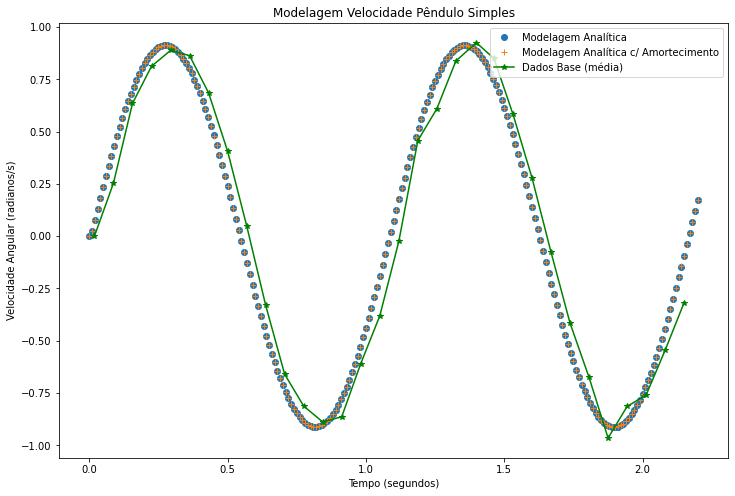

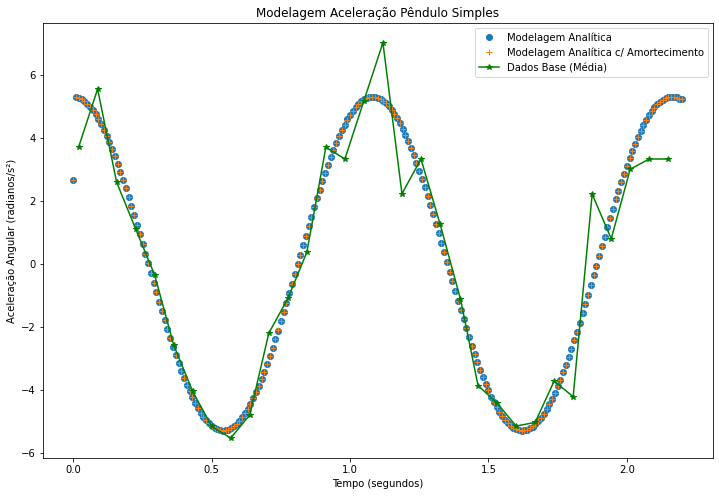

In [ ]:
print("Dados Médios")
print("Período Médio calculado: 1,067") 
print("Período Médio teórico: ", 2*math.pi/w0)


pyplot.figure(1, figsize=[12, 8])
pyplot.plot(tList,vList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,vListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEV_MED ,label='Dados Base (média)',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Velocidade Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Velocidade Angular (radianos/s)')
pyplot.legend()
pyplot.show(block=False)

pyplot.figure(2, figsize=[12, 8])
pyplot.plot(tList,accList,label='Modelagem Analítica',linestyle='',marker='o') 
pyplot.plot(tList,accListAmort,label='Modelagem Analítica c/ Amortecimento',linestyle='',marker='+') 
pyplot.plot(BASET,BASEACC_MED ,label='Dados Base (Média)',linestyle='-',marker='*', color="green") 
pyplot.title('Modelagem Aceleração Pêndulo Simples')
pyplot.xlabel('Tempo (segundos)')
pyplot.ylabel('Aceleração Angular (radianos/s²)')
pyplot.legend()
pyplot.show(block=False)